In [2]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import os

# Grid Based Initial Conditions

We consider a discrete 3D guassian field $g(\mathbf{x})$. We can obtain the overdensity field $f(\mathbf{x})$ 

$$
f(x_0, x_1, z_2) = \frac{p(x_0, x_1, x_2) - \langle g(x_0, x_1, x_2) \rangle}{\langle g(x_0, x_1, x_2) \rangle}
$$

which is a zero mean field, where $\langle g(x_0, x_1, x_2) \rangle$ is the mean of the field. We can obtain the discrete furier transform $F$ of the 3D field with

$$
F(k_0, k_1, k_2) = \sum_{x_0=-\infty}^{\infty} \sum_{x_1=-\infty}^{\infty} \sum_{x_2=-\infty}^{\infty} f(x_0, x_1, x_2) e^{-i(k_0 x_0 + k_1 x_1 + k_2 x_2)}
$$

As a quick refreshers, let us examine the discrete furier transform in a 1D field using python. 
(Or look here: https://sites.northwestern.edu/elannesscohn/2019/07/30/developing-an-intuition-for-fourier-transforms/)

Text(0, 0.5, 'Amplitude')

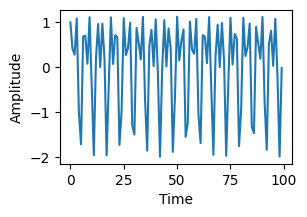

In [43]:
signal = jnp.linspace(0, 10, 100)
signal = jnp.cos(20 * signal) + jnp.sin(10 * signal)

fig, ax = plt.subplots(figsize=(3,2))

ax.plot(signal)
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')


Text(0, 0.5, 'Amplitude')

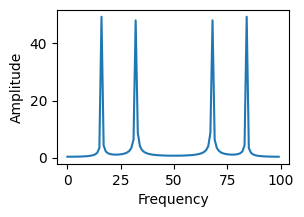

In [44]:
def dfft(signal):
    return jnp.abs(jnp.fft.fft(signal))

signal_fft = dfft(signal)
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(signal_fft)
ax.set_xlabel('Frequency')
ax.set_ylabel('Amplitude')

Text(0.5, 0, 'X')

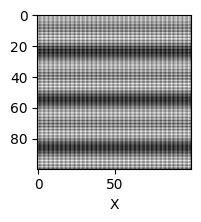

In [62]:
x, y = jnp.meshgrid(jnp.linspace(0, 10, 100), jnp.linspace(0, 10, 100))
signal_2d = jnp.cos(4 * y) + jnp.sin(30 * y) + jnp.cos(40 * x) + jnp.sin(2 * y)

fig, ax = plt.subplots(figsize=(3,2))
ax.imshow(signal_2d, cmap='gray')
ax.set_xlabel('X')

Text(0.5, 0, 'Frequency')

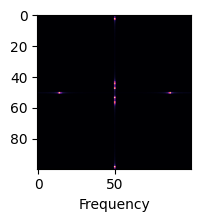

In [63]:
def dfft2(signal):
    return jnp.abs(jnp.fft.fft2(signal))

def shift(signal):
    return jnp.fft.fftshift(signal)

signal_2d_fft = dfft2(signal_2d)
# we need to shift the signal to center the low frequencies
signal_2d_fft = shift(signal_2d_fft)
fig, ax = plt.subplots(figsize=(3,2))
ax.imshow(signal_2d_fft, cmap='magma')
ax.set_xlabel('Frequency')

We denote a wave vector $\mathbf{k} = (k_0, k_1, k_2)$ and the power spectrum $P(k) = \langle |F(k)|^2 \rangle$. The power spectrum is isotropic, so we can write $P(k) = P(k)$. The power spectrum is related to the correlation function $\xi(r)$ by

In cosmology the power spectrum $P(k)$ is understood 